**<span style="color:red">Namn och CID på gruppmedlemmar: </span>**

Blend Ahmed Omar (blend), Ebbe Ledin (ebbel), Albin Östling (ostlinga)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from scipy import special # Importera funktion för att kunna generera bessel funktioner

In [2]:
# Funktioner för att lösa HUPP:en

def fft2c(x):
    '''
    2D Fourier transform
    
    Denna är perfekt som den är. Bara att använda!
    '''
    return np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x)))

def ifft2c(x):
    '''
    2D inverse Fourier transform
    
    Denna är perfekt som den är. Bara att använda!
    '''
    return np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(x)))

def rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays):
    '''
    Plottar strålar för HiRISE linsen med olika faskorrektioner
    '''
    
    # Definera start värden för strålarna
    y_rays        = np.linspace(-D_lins/2, D_lins/2, number_of_rays + 1)
    dfidy         = 2*c_2*y_rays + 4*c_4*y_rays**3
    k_y           = dfidy
    
    # Vinkel som strålarna propargerar med
    propvinkel    = np.arcsin(k_y/k0)
    
    # Längd som strålarna propagerar
    L_rays        = 1.1*f_lins
    
    # Slut y-värde för strålarna
    y_rays_prop   = y_rays + L_rays*np.tan(propvinkel)
    
    
    # Arrayer för att plottar strålarna
    x_plot_rays        = np.zeros([2, len(y_rays)])
    x_plot_rays[1, :]  = L_rays
    y_plot_rays        = np.zeros([2, len(y_rays)])
    y_plot_rays[0, :]  = y_rays
    y_plot_rays[1, :]  = y_rays_prop
    
    # Konvertera enheter till cm för plot
    cm = 1e-2
    y_plot_rays_cm = y_plot_rays/cm
    D_lins_cm      = D_lins/cm
    
    # Plotta en linje för fokalplanet för linsen
    x_f_lins = np.array([f_lins, f_lins])
    y_D_lins = np.array([-D_lins_cm/2, D_lins_cm/2])  
    
    
    # Plotta bild med strålar och fokalplanen för linsen
    plt.figure()
    plt.plot(x_plot_rays, y_plot_rays_cm, 'r', linewidth=0.5)
    plt.plot(x_f_lins, y_D_lins, 'black')
    
    plt.xlabel(r'z [m]')
    plt.ylabel(r'y [cm]')
    plt.title(r'Strålgång i HiRISE med korrektion $c_4=$' + str(c_4) + r' [m$^{-4}$]')
    
    # Plotta inzoomad bild med strålar och fokalplanen för linsen
    y_zoom_min = -0.04e-1
    y_zoom_max = np.abs(y_zoom_min)
    z_zoom_min = 3-5e-2
    z_zoom_max = 3+5e-2
    
    y_zoom_min_cm = y_zoom_min/cm
    y_zoom_max_cm = y_zoom_max/cm
    
    plt.figure()
    plt.plot(x_plot_rays, y_plot_rays_cm, 'r', linewidth=0.5)
    plt.plot(x_f_lins, y_D_lins, 'black')
    
    plt.ylim([y_zoom_min_cm, y_zoom_max_cm])
    plt.xlim([z_zoom_min, z_zoom_max])
    
    plt.xlabel(r'z [m]')
    plt.ylabel(r'y [cm]')
    plt.title(r'Inzoomning nära fokus med korrektion $c_4=$' + str(round(c_4, 2)) + r' [m$^{-4}$]')
    
def PSF_radiell(PSF_radiell_ickeparaxiell, N, samplavst_2D):
    '''
    Samplar om din PSF längst en axel till en 2D PSF.
    För att göra detta så interpolerar PSF:en som du har beräknat längst 
    en axel. Sen tar vi fram det radiella avtåndet till alla punkter 
    i uv-planet och använder det för att kalla på interpoleringen av din PSF.
    '''
    # Generera vektorer för 2D sampling
    u_range = N_2D*samplavst_2D/2
    u_2D = np.arange(-u_range, u_range, samplavst_2D)
    v_2D = u_2D
    U_2D, V_2D = np.meshgrid(u_2D, v_2D)

    # Radiellt avstånd till punkter i uv-planet
    R_UV = np.sqrt(U_2D**2 + V_2D**2)                   

    # Sampla om den radiella intensitets funktionen till 2D
    PSF_radiell_2D = np.interp(R_UV, u, PSF_radiell_ickeparaxiell)
    
    return PSF_radiell_2D, u_2D, v_2D

# Uppgift 1 - Beräkning av PSF


#### Komplettera den nästan färdiga givna funktionen PSF (endast två rader behöver kompletteras) så att rutinen beräknar PSFen längs u-axeln för avbildningen i HiRISE!


In [4]:
def PSF(u, L, k, X, Y, T_lins):
    '''
    Beräkna PSF:en i plan två för alla punkter i vektorn u
    '''
    # Initiera vektor för att spara PSF:en
    E_PSF_radiell_ickeparaxiell = np.zeros(len(u), dtype=complex)
    
    
    # Iterera genom alla beräkningspunkterna längs u-axeln
    for i in range(len(u)):
        if i % 10 == 0:
            print(f'Calculating PSF for point: {i} of {len(u)}')
            
        u_current                      = u[i]      # u-koordinat för nuvarande beräkningspunkt                 
        r                              = np.sqrt(L**2 + (X-u_current)**2 + (Y)**2)       # Matris med avstånd från alla sampelpunkter i Plan 1 till aktuell beräkningspunkt
        E_PSF_radiell_ickeparaxiell[i] = np.sum(np.sum(T_lins* np.exp(1j*k*r) / r))       # Fältet i beräkningspunkten, beräknat med HFM-integralen
        
    return E_PSF_radiell_ickeparaxiell

#### Koden plottar också vad den paraxiella approximationen skulle ge för resultat.

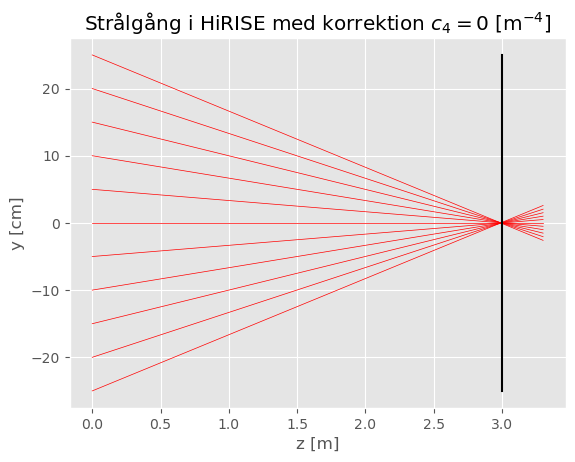

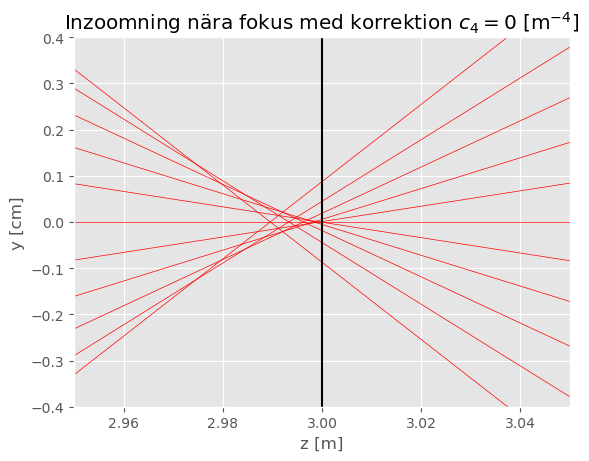

In [5]:
#%% Fixa faskorrektionen för HiRISE speglen %##
### Definerar variabler ###
D_lins         = 0.5              # Linsens diameter   [m]
L              = 3                # Propagations längd [m]
f_lins         = L                # Linsens fokallängd [m]
lam0           = 600e-9           # Våglängd           [m]
k0             = 2*np.pi/lam0     # Vågvektor          [1/m]

number_of_rays = 10               # Antal strålar att plotta


c_2            = -k0/(2*f_lins)   # Linsens fasmodulering
c_4            = 0                # Faskorrektion (För uppgift 1 ska vara c_4 = 0)

### Plottar stålgång för linser ###
rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays)

#### **Jämför det paraxiella resultatet med det optiska systemets verkliga PSF – är du nöjd med den verkliga PSFen?**

Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


Text(0.5, 1.0, '$I_{PSF,norm}$, $c_4$ = 0')

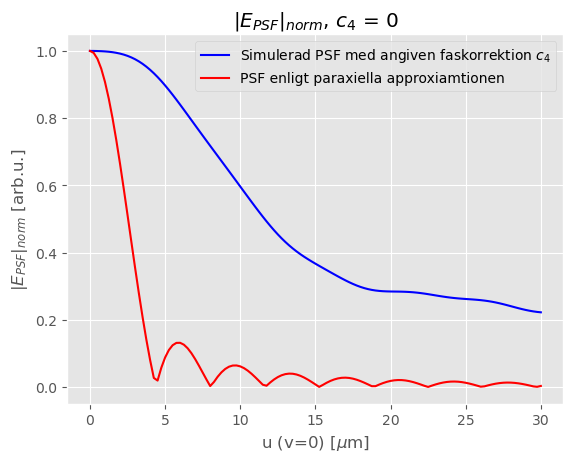

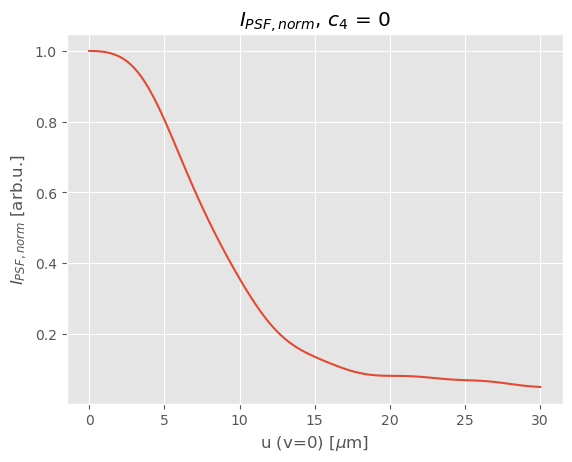

In [7]:
N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavstånd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avstånd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion för linsen
T_lins  = np.exp(1j*fi_lins)*(R < D_lins/2) # TOK för linsen

### Generera punkter längs u-axeln i plan 2 där PSF:en ska beräknas ###
steg_i_u_led = 0.25e-6                            # Samplingslängd längs u-axeln
u_max        = 30e-6                              # Maxlängd för u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner där PSF:en beräknas 

### Beräkna PSF:en längs u-axeln ###
# Komplettera funktionen PSF för att det ska fungera!
E_PSF_radiell_ickeparaxiell = PSF(u, L, k0, X, Y, T_lins)

# Teoretisk PSF. Ska vara mycket lik den beräknande PSF:en med rätt faskorrektion c_4
E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod = special.jv(1, k0*D_lins/(2*L)*(u+steg_i_u_led*1e-5))/(u+steg_i_u_led*1e-5)


### Plotta PSF:en ###
# Skala om värden för att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_norm = np.abs(E_PSF_radiell_ickeparaxiell)/np.abs(E_PSF_radiell_ickeparaxiell[0])
E_PSF_teori_norm =  np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod)/np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod[0])


plt.figure()
plt.plot(u_um, E_PSF_norm, color= "blue", label='Simulerad PSF med angiven faskorrektion $c_4$')
plt.plot(u_um, E_PSF_teori_norm, 'r', label='PSF enligt paraxiella approxiamtionen')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Beräkna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell = np.abs(E_PSF_radiell_ickeparaxiell)**2
PSF_radiell_ickeparaxiell_norm = PSF_radiell_ickeparaxiell/PSF_radiell_ickeparaxiell[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, $c_4$ = ' + str(round(c_4, 2)))

*SVARA HÄR*
Jämförelse av det paraxiella resultatet med det optiska systemets verkliga PSF ger att vi inte är nöjda, då de skiljer sig markant.

# Uppgift 2 - Utför spegelkorrektion!


Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


Text(0.5, 1.0, '$I_{PSF,norm}$, $c_4$ = 48500')

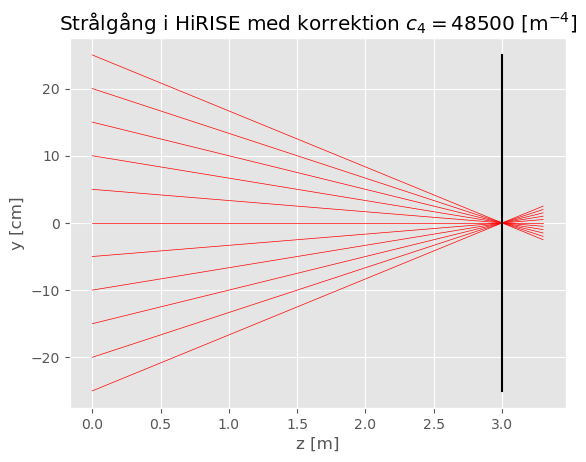

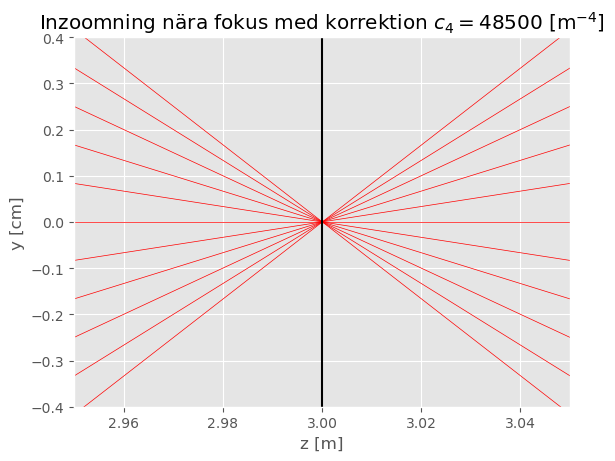

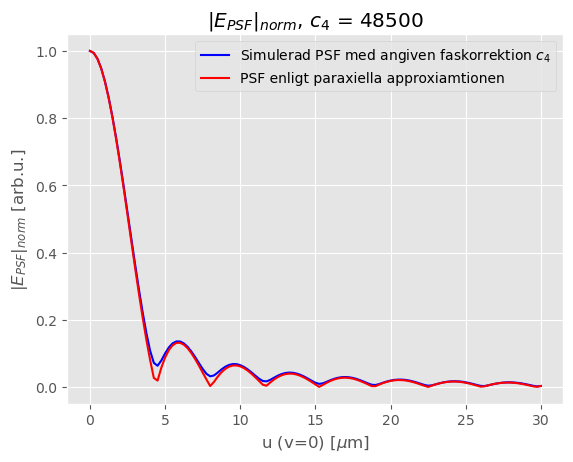

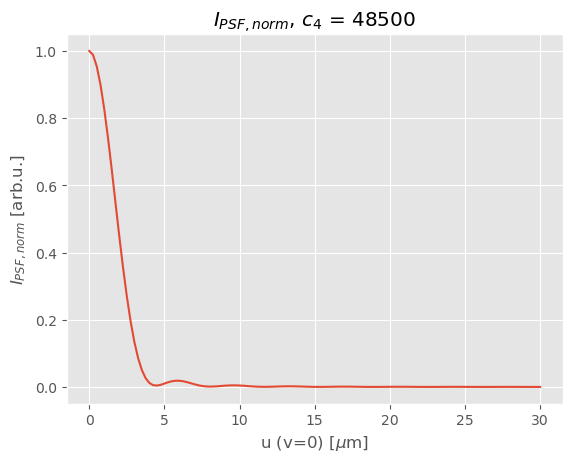

In [23]:
# kod

#%% Fixa faskorrektionen för HiRISE speglen %##
### Definerar variabler ###
D_lins         = 0.5              # Linsens diameter   [m]
L              = 3                # Propagations längd [m]
f_lins         = L                # Linsens fokallängd [m]
lam0           = 600e-9           # Våglängd           [m]
k0             = 2*np.pi/lam0     # Vågvektor          [1/m]

number_of_rays = 10               # Antal strålar att plotta


c_2            = -k0/(2*f_lins)   # Linsens fasmodulering
c_4            = 48500 # Faskorrektion (För uppgift 1 ska vara c_4 = 0)

### Plottar stålgång för linser ###
rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays)

N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavstånd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avstånd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion för linsen
T_lins  = np.exp(1j*fi_lins)*(R < D_lins/2) # TOK för linsen

### Generera punkter längs u-axeln i plan 2 där PSF:en ska beräknas ###
steg_i_u_led = 0.25e-6                            # Samplingslängd längs u-axeln
u_max        = 30e-6                              # Maxlängd för u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner där PSF:en beräknas 

### Beräkna PSF:en längs u-axeln ###
# Komplettera funktionen PSF för att det ska fungera!
E_PSF_radiell_ickeparaxiell = PSF(u, L, k0, X, Y, T_lins)

# Teoretisk PSF. Ska vara mycket lik den beräknande PSF:en med rätt faskorrektion c_4
E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod = special.jv(1, k0*D_lins/(2*L)*(u+steg_i_u_led*1e-5))/(u+steg_i_u_led*1e-5)


### Plotta PSF:en ###
# Skala om värden för att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_norm = np.abs(E_PSF_radiell_ickeparaxiell)/np.abs(E_PSF_radiell_ickeparaxiell[0])
E_PSF_teori_norm =  np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod)/np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod[0])


plt.figure()
plt.plot(u_um, E_PSF_norm, color= "blue", label='Simulerad PSF med angiven faskorrektion $c_4$')
plt.plot(u_um, E_PSF_teori_norm, 'r', label='PSF enligt paraxiella approxiamtionen')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Beräkna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell = np.abs(E_PSF_radiell_ickeparaxiell)**2
PSF_radiell_ickeparaxiell_norm = PSF_radiell_ickeparaxiell/PSF_radiell_ickeparaxiell[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, $c_4$ = ' + str(round(c_4, 2)))

# Uppgift 3 - Hur stor är korrektionen i mm?

#### **Hur mycket ändras det fysiska djupet hos HiRISE-spegeln genom din faskorrektion?**

[0.00000000e+00 2.31570442e-11 3.70512708e-10 1.87572058e-09
 5.92820332e-09 1.44731526e-08 3.00115293e-08 5.56000632e-08
 9.48512531e-08 1.51933367e-07 2.31570442e-07 3.39042284e-07
 4.80184469e-07 6.61388340e-07 8.89601011e-07 1.17232536e-06
 1.51762005e-06 1.93409949e-06 2.43093387e-06 3.01784916e-06
 3.70512708e-06 4.50360512e-06 5.42467655e-06 6.48029041e-06
 7.68295150e-06 9.04572040e-06]


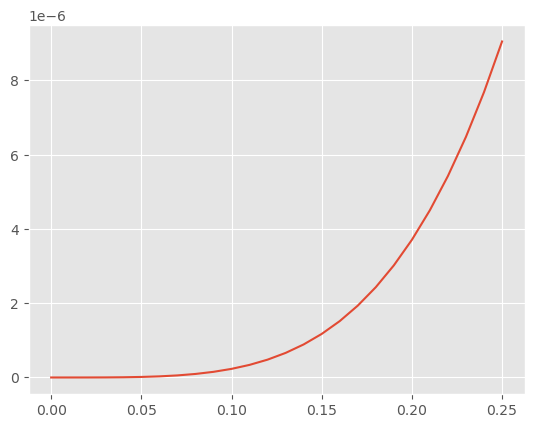

In [39]:
# KOD
x_values = np.arange(0, 0.251, 0.01)
delta_phi=c_4*x_values**4
delta_z=delta_phi /(2*k0)
print(delta_z)


plt.plot(x_values, delta_phi/(2*k0))
plt.show()


Man ser på grafen att skillnaden vid mitten av spegeln är 0 och ökar ju längre ut man kommer. Vid kanten är den ca. 9 mikrometer

# Uppgift 4 - Hål i bilden?

#### Modifiera er anrop till funktionen PSF, genom att komplettera linsens transmissionsfunktion $T_{lins}$ så att den även inkluderar en central blockering med diametern $𝐷_{block} = 15$ cm. Använd den optimerade fasmoduleringen för spegeln som du bestämde i deluppgift 2. Beräkna den PSF som erhålls, och bedöm med din magkänsla huruvida bilden av Marsytan kommer att bli mycket sämre, jämfört med fallet utan blockering! 

In [ ]:
# KOD


#### **Skapar blockeringen rentav ett mörkt hål i bilden, och i så fall var i bilden uppstår hålet?**

*SVARA HÄR*

# Uppgift 5 - Simulering av bilden av Marsytan i teleskopets detektorplan

#### **<span style="background-color:yellow">Gör simuleringen för två fall:</span>** utan respektive med den centrala cirkulära blockeringen som beskrivs i uppgift 4.

#### **(i)** Bilden av Marsytan, över området där Mark råkar befinna sig. Den täcker ett område av 400×400 meter och har 5000×5000 pixlar. Denna bild kommer att användas som den ”perfekta bilden” på teleskopets detektor. **Vad blir samplingsavståndet hos den perfekta bilden i teleskopets detektorplan?**

In [ ]:
N_2D = 5000                                          # Antal samplingspunkter för 2D
samplavst_2D = .x.                                   # Samplingsavstånd
print(samplavst_2D)

#### **(ii)** Du har redan beräknat PSFen för avbildningen, med den korrigerade linsen. Denna PSF ska du använda för att simulera hur bilden av Marsytan blir. För att använda faltningssatsen måste din radiella PSF samplas om till en tvådimensionell funktion i $(𝑢,𝑣)$-planet, med samma samplings-avstånd och matrisstorlek som den perfekta bilden: Använd den färdiga funktionen PSF_radiell med ditt värde på $𝑐_4$ för den korrigerade linsen för att skapa en matris som innehåller PSFen i teleskopets detektorplan, med samma samplingsavstånd och matrisstorlek som den perfekta bilden. Zooma in centrum av matrisen för att se att din PSF verkar OK!

In [ ]:
# Skapa radiell 2D PSF
PSF_radiell_2D, u_2D, v_2D = PSF_radiell(PSF_radiell_ickeparaxiell, N, samplavst_2D)

u_2D_um = u_2D*1e6
v_2D_um = v_2D*1e6

# Normalisering för plottning
PSF_radiell_2D_norm = PSF_radiell_2D/np.max(PSF_radiell_2D)

# Plotta den 2D samplade PSF:en
plt.figure()
image = plt.imshow(PSF_radiell_2D_norm, extent = [u_2D_um.min(), u_2D_um.max(), v_2D_um.min(), v_2D_um.max()])
plt.colorbar(image)

plt.xlabel(r'u [$\mu$m]')
plt.ylabel(r'v [$\mu$m]')
plt.title(r'Omsamplad PSF. PSF:en i detektorplanet på HiRISE')

# Zooma in på PSF:en
plt.xlim([-8, 8])
plt.ylim([-8, 8])

#### **(iii)** Läs in den perfekta bilden (för enkelhets skull har bilden gjorts om till gråskala). Zooma in i bilden, ungefär som markeras ovan, så att du förvissar dig om att Marks rover, hans fotspår och roverns hjulspår finns med!

In [ ]:
# Inläsning av bild. Bilden måste ligga i samma map som ni kör skriptet från.
perfect_image = plt.imread('highly_resolved_photo_of_Marks_surroundings.jpg')

plt.figure()
plt.imshow(perfect_image, cmap='gray')

plt.figure()
plt.imshow(perfect_image, cmap='gray')

# Använd xlim och ylim för att zooma in i bilden och hitta rovern
plt.xlim([1200, 3650])
plt.ylim([1200, 3000])

#### **(iv)** Falta den erhållna tvådimensionella PSFen med den perfekta bilden för att få den verkliga intensitetsfördelningen i detektorplanet!

In [ ]:
image_PSF = .x.

plt.figure()
plt.imshow(np.real(image_PSF), cmap='gray')

plt.figure()
plt.imshow(np.real(image_PSF), cmap='gray')

# Använd xlim och ylim för att zooma in i bilden och hitta rovern
plt.xlim([1200, 3650])
plt.ylim([1200, 3000])

####  **Vad säger du, är The Martian sann?**

*SVARA HÄR*